In [2]:
import numpy as np
from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import spectral_cube
import aplpy
from math import ceil
import pyspeckit
import colorcet
import matplotlib as mpl

plt.style.use('paper')

/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
inputfile1_rgb = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/data_regrid/hershel8.fits'
inputfile2_rgb = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/rgb_final_uncropped.jpeg'
hdu_rgb = fits.open(inputfile1_rgb)[0]

# inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.rebin.K.kms.0.5kmschannel.galactic.max.fits'
# hdu_max = fits.open(inputfile_max)[0]

# inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/datareduction_cont/data/raw/SgrB2_5pass_1_.0.2_10mJy_10mJy_w_session5_final_smooth4_PlanckCombined_10feb2020.fits'
# hdu_max = fits.open(inputfile_max)[0]
# hdu_max.data = hdu_max.data*1e3

# inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/raw/HIGAL0000p015_250_RM.fits'
# hdu_max = fits.open(inputfile_max)[0]
# hdu_max.data = hdu_max.data/1e4

inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/raw/gaussfit_iter_with70beta175_column_gc_itervar_conv25.fits'
hdu_max = fits.open(inputfile_max)[0]

from astropy.convolution import interpolate_replace_nans
from astropy.convolution import Gaussian2DKernel
kernel = Gaussian2DKernel(1)
result = interpolate_replace_nans(hdu_max.data, kernel)
hdu_max.data = result

nan_treatment='interpolate', however, NaN values detected post convolution. A contiguous region of NaN values, larger than the kernel size, are present in the input array. Increase the kernel size to avoid this.


linewidths is ignored by contourf


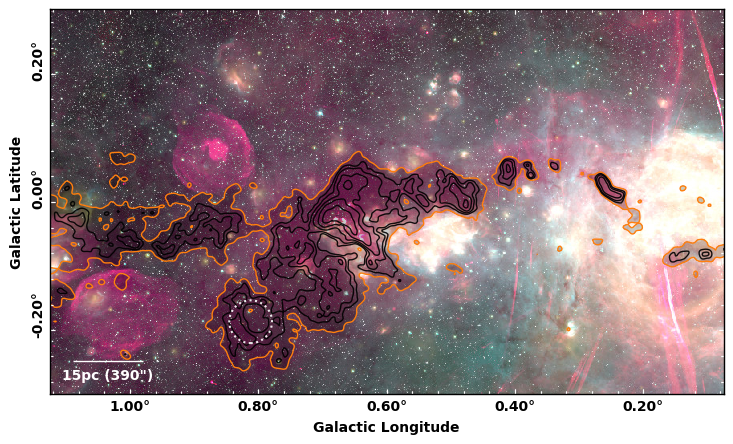

In [21]:
fig = plt.figure(figsize=(10, 5)) 

ax = aplpy.FITSFigure(inputfile1_rgb, figure=fig, subplots=(1,2,2))
ax.show_rgb(inputfile2_rgb)

ax.recenter(0.6, 0.0, width=1.05, height=0.6)
ax.tick_labels.set_xformat('dd.dd')
ax.tick_labels.set_yformat('dd.dd')

ax.show_ellipses(0.8119, -0.1868, 240/3600, 240/3600, edgecolor='white', linestyles='dotted', linewidths=1.5, zorder=10., alpha=0.9)
ax.add_scalebar(390*u.arcsec, corner='bottom left', color='white')
ax.scalebar.set_label('15pc (390")')

# ax.show_contour(hdu_max, levels=[25], colors='black', linewidths=1, smooth=3, convention='wells')
# ax.show_contour(hdu_max, levels=[1,100], colors='black', linewidths=1, smooth=1, alpha=0.2, filled=True)
# ax.show_contour(hdu_max, levels=[1,1.2,1.5,2,3], colors='black', linewidths=1, smooth=1, alpha=0.9)

ax.show_contour(hdu_max, levels=[5,10000], colors='black', linewidths=1, alpha=0.2, filled=True)
ax.show_contour(hdu_max, levels=[5], colors='C1', linewidths=1, alpha=1)
ax.show_contour(hdu_max, levels=[7.5,10,15,25,50], colors='black', linewidths=1, alpha=0.9)

for i, ax in enumerate(fig.get_axes()):
    if i in [0,3,6]:
        axes = fig.get_axes()
        ra_ = axes[i].coords[0]
        dec_ = axes[i].coords[1]
        dec_.ticklabels.set_rotation(90)

fig.savefig('../figures/cmz_rgb.pdf')